In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  = pd.read_csv(r"C:\Users\tahay\Desktop\cov19.csv",index_col = 'tarih')
cov19 = data['24.03.2021':'25.11.2020']
cov19.head()

,gunluk_test,gunluk_vaka,gunluk_hasta,gunluk_vefat,gunluk_iyilesen,toplam_test,toplam_hasta,toplam_vefat,toplam_iyilesen,toplam_yogun_bakim,toplam_entube,hastalarda_zaturre_oran,agir_hasta_sayisi,yatak_doluluk_orani,eriskin_yogun_bakim_doluluk_orani,ventilator_doluluk_orani,ortalama_filyasyon_suresi,ortalama_temasli_tespit_suresi,filyasyon_orani
tarih,,,,,,,,,,,,,,,,,,,
24.03.2021,221.738,29.762,1.142,146.0,17.761,36.990.175,3.091.282,30.462,2.881.643,NaN,NaN,"4,2",1.720,"53,8","65,0","23,3",NaN,9,"99,9"
23.03.2021,211.848,26.182,1.006,138.0,19.201,36.768.437,3.061.520,30.316,2.863.882,NaN,NaN,"4,2",1.710,"53,8","65,0","23,3",NaN,9,"99,9"
22.03.2021,201.215,22.216,981.000,117.0,19.494,36.556.589,3.035.338,30.178,2.844.681,NaN,NaN,"4,2",1.644,"53,8","65,0","23,3",NaN,9,"99,9"
21.03.2021,189.906,20.428,965.000,102.0,17.615,36.355.374,3.013.122,30.061,2.825.187,NaN,NaN,"3,2",1.568,"51,6","66,2","29,8",NaN,9,"99,9"
20.03.2021,190.129,21.061,958.000,95.0,18.815,36.165.468,2.992.694,29.959,2.807.572,NaN,NaN,"3,2",1.538,"51,6","66,2","29,8",NaN,9,"99,9"


In [3]:
cov19['toplam_test'] = cov19['toplam_test'].str.replace(".","").astype('float64')
cov19['toplam_hasta'] = cov19['toplam_hasta'].str.replace(".","").astype('float64')
cov19['toplam_iyilesen'] = cov19['toplam_iyilesen'].str.replace(".","").astype('float64')

cov19.drop(['hastalarda_zaturre_oran','ortalama_temasli_tespit_suresi','filyasyon_orani','ventilator_doluluk_orani','ortalama_filyasyon_suresi','toplam_yogun_bakim','toplam_entube'],axis=1,inplace= True)

cov19["yatak_doluluk_orani"] = cov19["yatak_doluluk_orani"].str.replace(",",".").astype('float64')

cov19["eriskin_yogun_bakim_doluluk_orani"] = cov19["eriskin_yogun_bakim_doluluk_orani"].str.replace(",",".").astype('float64')

C:\Users\tahay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tahay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tahay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

r ile gösterilir. Korelasyon -1 ile +1 arasında değer alır. +1 ise ilişki tam güçlü ve pozitif yönlü yani biri artarken diğeri de artar.Azalırken diğeri de azalır.
-1 ise tam güçlü  ve negatif yani biri artarken diğeri azalır ve biri azalırken diğeri artar. 0 değeri ise iki değişken arasında bir ilişki olmadığını belirtir.
Değerler 1 yada -1'e ne kadar yakınsa ilişki o kadar güçlüdür.
1) Pearson korelasyon: Bu korelasyon veriler normal dağılıma sahip olduğunda tercih edilen bir hesaplama işlemidir. 
2) Spearmon Korelasyon : eğer veriler normal dağılıma sahip değilse spearmon hesaplama  ile korelasyon hesaplanır.

Biz burada gunluk vefat tahmini yapacağımız için gunluk vefat ile diğer gözlem birimleri arasında ki korelasyonu inceleyelim. Analiz sonucunda gunluk vefat ile aralarında herhangi bir korelasyon bulunmuyan veya çok zayıf bir korelasyon olan gözlemleri veri setimizden atabiliriz ki böylelikle veri setimiz daha anlamlı hale gelecektir.


In [15]:
cov19.columns

Index(['gunluk_test', 'gunluk_vaka', 'gunluk_hasta', 'gunluk_vefat',
       'gunluk_iyilesen', 'toplam_test', 'toplam_hasta', 'toplam_vefat',
       'toplam_iyilesen', 'agir_hasta_sayisi', 'yatak_doluluk_orani',
       'eriskin_yogun_bakim_doluluk_orani'],
      dtype='object')

In [ ]:
X = cov19[['agir_hasta_sayisi']] # bağımsız değişkenimiz
Y = cov19[['gunluk_vefat']] # bağımlı değişkenimiz

In [4]:
X = cov19.drop('gunluk_vefat',axis=1) # bağımsız değişkenlerimiz
Y = cov19[['gunluk_vefat']] # bağımlı değişkenimiz

Pearson correlation coefficient: 0.880139


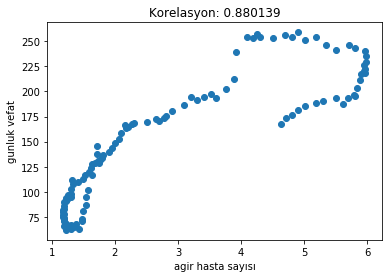

In [5]:
x= list(X['agir_hasta_sayisi'])
y = list(Y['gunluk_vefat'])
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)
total = 0
total1 = 0
total2 = 0
for xi,yi in zip(x,y):
    total += (xi-x_mean)*(yi-y_mean)
    total1 +=(xi-x_mean)**2
    total2 += (yi-y_mean)**2
r = total/(total1*total2)**(1/2)
print("Pearson correlation coefficient:",round(r,7))
plt.scatter(x,y)
plt.title(f'Korelasyon: {round(r,7)}')
plt.xlabel('agir hasta sayısı')
plt.ylabel("gunluk vefat")
plt.show()

standart_sapmaX: 8.8366737
standart_sapmaY: 63.4155935
Kovaryans: 282.8512396
Korelasyon Katsayısı: 0.5047464


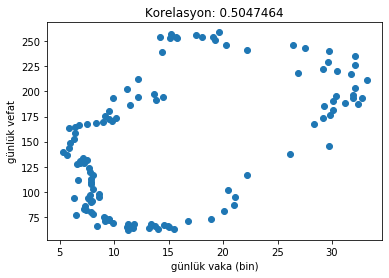

In [20]:
x= list(X['gunluk_vaka'])
y = list(Y['gunluk_vefat'])
N = len(x) # verinin eleman sayısı
x_ort = (sum(x)/N) # x ortalama
y_ort = (sum(y)/N) # y ortalama

toplam=0 # kovaryans için toplam 
varyansX = 0
varyansY = 0
for xi,yi in zip(x,y):
    toplam += ((xi-x_ort)*(yi-y_ort))
    varyansX += (((xi-x_ort)**2)/N)
    varyansY += (((yi-y_ort)**2)/N)
                                                                      

kovaryans = toplam/N
standart_sapmaX = pow(varyansX,1/2)
standart_sapmaY = pow(varyansY,1/2)

r = kovaryans/(standart_sapmaX*standart_sapmaY)
print("standart_sapmaX:",round(standart_sapmaX,7))
print("standart_sapmaY:",round(standart_sapmaY,7))
print("Kovaryans:",round(kovaryans,7))
print("Korelasyon Katsayısı:",round(r,7))
plt.scatter(x,y)
plt.title(f'Korelasyon: {round(r,7)}')
plt.xlabel('günlük vaka (bin)')
plt.ylabel("günlük vefat")
plt.show()

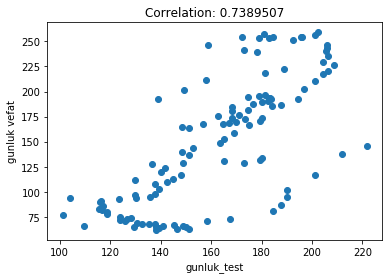

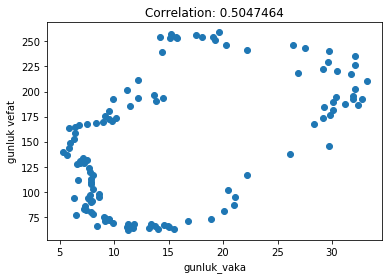

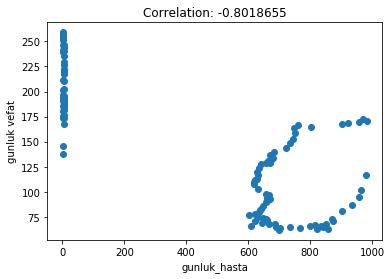

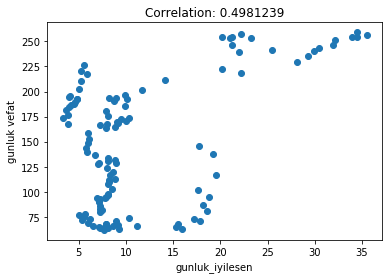

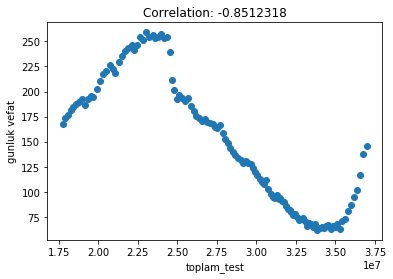

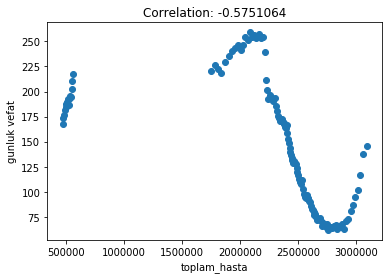

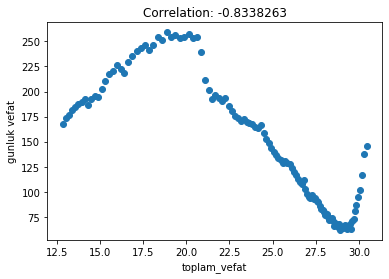

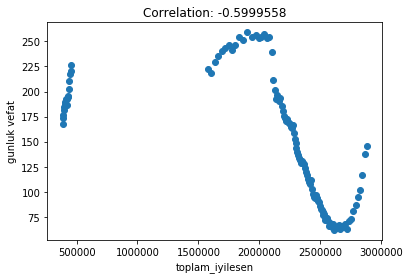

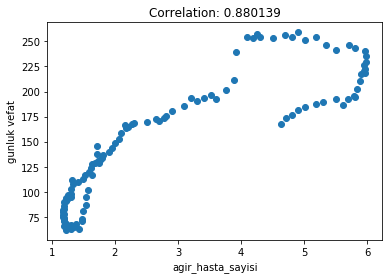

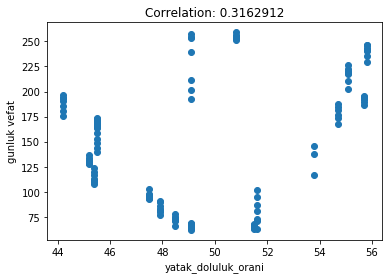

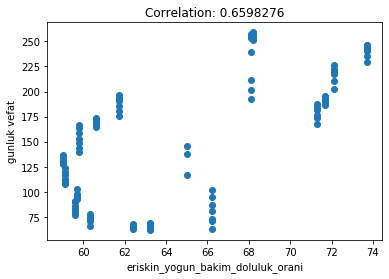

In [21]:
for i in X.columns:
    x = list(X[i])
    y = list(Y["gunluk_vefat"])
    N = len(x) #number of data values
    x_mean = (sum(x)/N) # mean of x
    y_mean = (sum(y)/N) # mean of y

    total=0 # this is +((xi-m(x)*(yi-m(y))
    varianceX = 0
    varianceY = 0
    for xi,yi in zip(x,y):
        total += ((xi-x_mean)*(yi-y_mean))
        varianceX += (((xi-x_mean)**2)/N)
        varianceY += (((yi-y_mean)**2)/N)
                                                                      

    population_covariance = total/N
    standart_deviationX = pow(varianceX,1/2)
    standart_deviationY = pow(varianceY,1/2)

    r = population_covariance/(standart_deviationX*standart_deviationY)
    plt.scatter(x,y)
    plt.title(f'Correlation: {round(r,7)}')
    plt.xlabel(i)
    plt.ylabel("gunluk vefat")
    plt.show()